# SyriaTel Customer Churn Prediction
Author: **Mwenda Mugambi**

---

# 1. Business Understanding

### Stakeholder: 
The Marketing and Retention Department of SyriaTel, a telecommunications company.

### Business Problem: 
Customer retention is a significant challenge for many businesses, especially in industries with competitive markets such as telecommunications. When customers churn, or stop doing business, the company not only loses future revenue but also the money they invested in acquiring that customer. Identifying patterns or traits of customers who are likely to churn can help the Marketing and Retention Department proactively offer targeted promotions, incentives, or interventions to retain these customers, thereby maximizing revenue.

# 2. Data Understanding

In this section, we'll load the dataset, explore its structure, examine its features, and identify any potential data quality issues. This will give us a solid foundation upon which we can build our subsequent analysis and modeling.

### i). Loading Libraries
First, we'll import all the necessary libraries that we'll use throughout the project.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

### ii). Loading the Dataset
Next, we'll load the dataset and take a quick look at its first few rows.
We will be using the **"Churn in Telecom's dataset"** from https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

In [2]:
# Loading the dataset
df = pd.read_csv("Dataset/data.csv")

# Displaying the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### iii). Dataset Structure
Now we go into understanding the dataset's structure, such as the number of rows, columns, data types, and any missing values.

In [3]:
# Checking the shape of our data
df.shape

(3333, 21)

We can see that we have 3333 rows and 21 columns 

In [4]:
#Chscking the names of our 21 columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Column Descriptions
---
- <code><b>state</b></code>, string. 2-letter code of the US state of customer residence
- <code><b>account_length</b></code>, numerical. Number of months the customer has been with the current telco provider
- <code><b>area_code</b></code>, numerical, 3 digit area code.
- <code><b>phone_number</b></code>, string, customer's phone number
- <code><b>international_plan</b></code>, (yes/no). The customer has international plan.
- <code><b>voice_mail_plan</b></code>, (yes/no). The customer has voice mail plan.
- <code><b>number_vmail_messages</b></code>, numerical. Number of voice-mail messages.
- <code><b>total_day_minutes</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_calls</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_charge</b></code>, numerical. Total charge of day calls.
- <code><b>total_eve_minutes</b></code>, numerical. Total minutes of evening calls.
- <code><b>total_eve_calls</b></code>, numerical. Total number of evening calls.
- <code><b>total_eve_charge</b></code>, numerical. Total charge of evening calls.
- <code><b>total_night_minutes</b></code>, numerical. Total minutes of night calls.
- <code><b>total_night_calls</b></code>, numerical. Total number of night calls.
- <code><b>total_night_charge</b></code>, numerical. Total charge of night calls.
- <code><b>total_intl_minutes</b></code>, numerical. Total minutes of international calls.
- <code><b>total_intl_calls</b></code>, numerical. Total number of international calls.
- <code><b>total_intl_charge</b></code>, numerical. Total charge of international calls
- <code><b>number_customer_service_calls</b></code>, numerical. Number of calls to customer service
- <code><b>churn</b></code>, (yes/no). Customer churn - target variable.

In [5]:
# Displaying general information about the dataset 
# to confirm if the datatypes in the description match entries in our dataert
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From this output, it seems that the majority of the numerical columns have the appropriate data type. However, a few columns are currently categorized as the object data type and require conversion to a numerical format. Specifically, the "international plan" and the "voice mail plan" that contain entries as "yes" or "no" and should be converted to "1" for "yes" and "0" for "no." Similarly, the "churn" column would also need a change in its data type, with its entries being modified to numerical values,  "1" for "True" and "0" for "False."

In [6]:
# Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

We can see that we do not have any missing values to take care of.

### iv).Basic Statistics
Here, We'll get a brief statistical overview of the numerical features in the dataset.

In [7]:
# Displaying basic statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The data looks normal without and doesn't seem to have any glaring outliers.

# 3. EDA

### 1). Checking for Placeholders
Missing data can sometimes be hidden as placeholders such as "Unknown", "N/A", or any non-standard values. 
Let's check unique values in categorical columns to identify any such placeholders.

In [8]:
# Checking unique values in categorical columns
categorical_columns = ['state', 'international plan', 'voice mail plan', 'churn']

for column in categorical_columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    print(f"Unique values in {column}: {unique_values} total= {total_unique}")

Unique values in state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] total= 51
Unique values in international plan: ['no' 'yes'] total= 2
Unique values in voice mail plan: ['yes' 'no'] total= 2
Unique values in churn: [False  True] total= 2


Great! There doesn't seem to be any placeholders

##### Dropping the "phone number" column

Since we are working with a telecommunications company, the **"phone number"** column represents the Customer's unique IDs so this would not be an integreal feature in our analysis. We can just check to see if there are duplicate IDs and if not we can proceed to drop the column entirely.

In [9]:
# Checking for duplicates in the phone number column
print(f"There's {df['phone number'].duplicated().sum()} duplicate entries")

There's 0 duplicate entries


In [10]:
# Dropping the phone number column from the dataset 
df.drop('phone number', axis=1, inplace=True)

### 2). Univariate Analysis
Let's visualize the distribution of some key numerical and categorical features in our dataset.

#### 2.1 Numerical Features
Let's plot histograms to give us a sense of the distribution of values for each numerical feature.

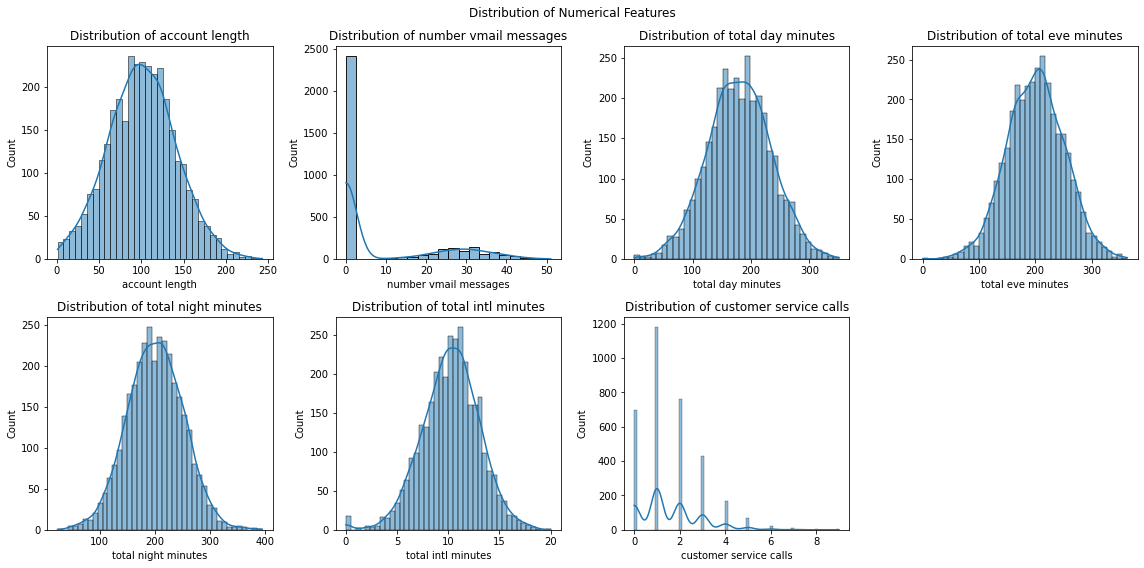

In [11]:
# Defining the numerical features
numerical_features = ['account length', 'number vmail messages', 
                      'total day minutes', 'total eve minutes', 
                      'total night minutes', 'total intl minutes', 'customer service calls']

# Setting up subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Distribution of Numerical Features')

# Flattening the axes for easier iteration
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Removing any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

* Most of the numeric features appear to be have a normal distribution.
* The 'number vmail messages'. appears to have outliers We'll need to decide whether to cap, transform, or keep these outliers during preprocessing.

#### 2.2 Categorical Features
For the categorical features, Bar plots will give us a sense of the distribution of values for each categorical feature.

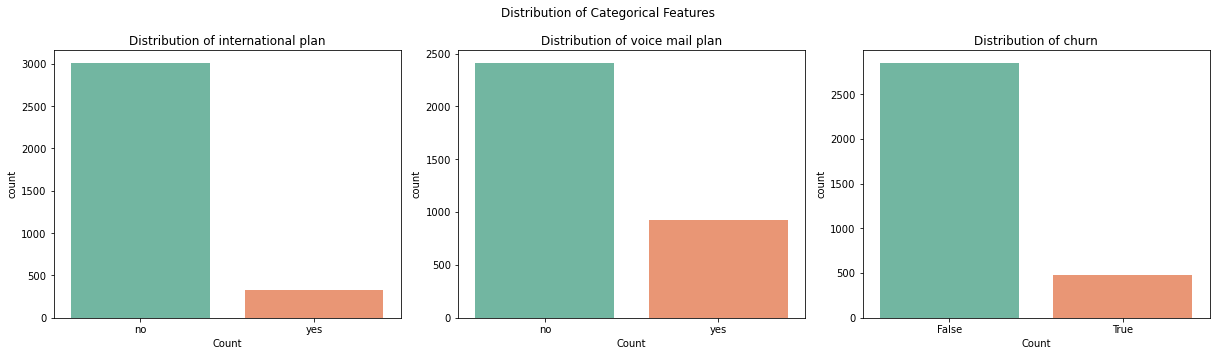

In [12]:
# Defining the list of categorical features (excluding 'state')
categorical_features = ['international plan', 'voice mail plan', 'churn']

# Setting up subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(17, 5))
fig.suptitle('Distribution of Categorical Features')

for i, feature in enumerate(categorical_features):
    sns.countplot(x =df[feature], order=df[feature].value_counts().index, ax=axes[i], palette= "Set2")
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Count')
    
plt.tight_layout()
plt.show()

* The majority of customers don't have an 'international plan' or a 'voice mail plan'. This skewed distribution might make these features significant predictors if the minority class (those with plans) shows a distinct churn behavior. 

* The churn rate is relatively low, which suggests an imbalanced dataset.
  We'll need to consider strategies like oversampling, undersampling, or using specific algorithms to handle this imbalance.

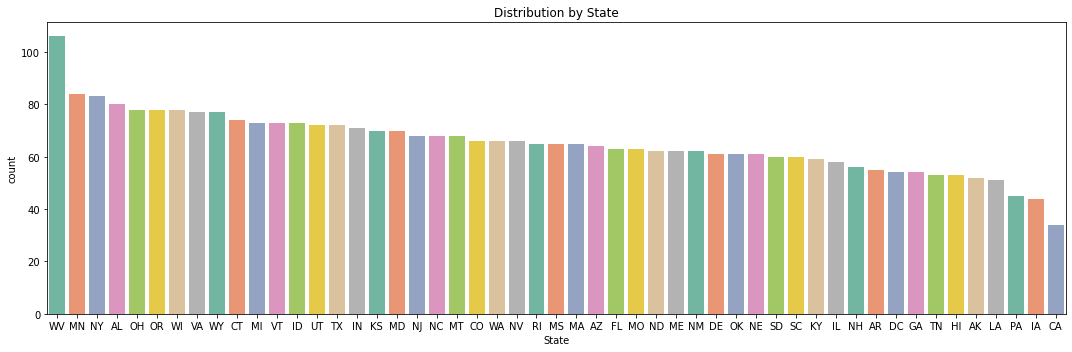

In [13]:
# Plotting countplots for the states
plt.figure(figsize=(15,5))
sns.countplot(x=df['state'], order= df['state'].value_counts().index, palette="Set2")
plt.title('Distribution by State')
plt.xlabel('State')

plt.tight_layout()
plt.show();

* There's a varied distribution of customers across states. Some states have a noticeably higher number of customers, with WV with the highest and CA with the lowest. This geographic data might influence churn, especially if certain regions have better or worse service quality. It could however be distributed in this manner depending on the population in the states. There's a chance CA is a scarsely populated area while WV is densely populated. Without the relevant context and realtime data, This column may not be crucial in our analysis.

### 3). Bivariate Analysis
Next up we explore the relationship between key features and our target variable **churn**.

#### 3.1 Numerical Features vs Churn
We can use Box plots to help us see the distribution of numerical features across different churn categories.

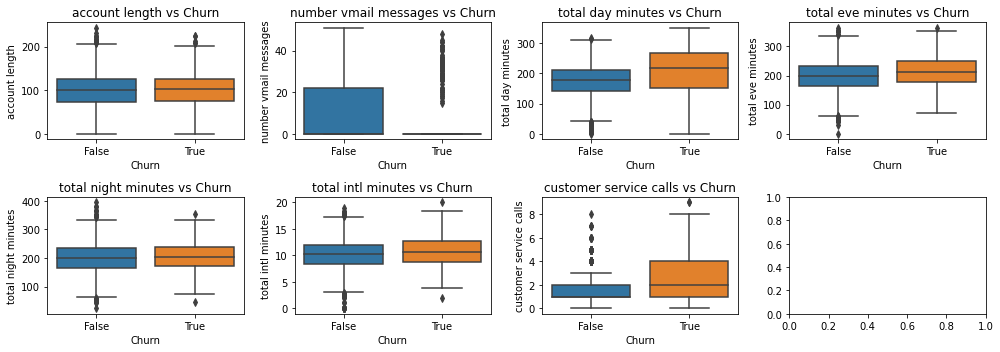

In [14]:
# Setting up subplots
fig, axes = plt.subplots(2, 4, figsize=(14, 5))

for i, feature in enumerate(numerical_features):
    row, col = i // 4, i % 4
    sns.boxplot(x="churn", y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Churn')
    axes[row, col].set_xlabel('Churn')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show();

The box plots reveal some patterns:
* Customers with higher 'total day minutes' and 'total day charge' seem more likely to churn.
* High 'customer service calls' also indicate a higher likelihood of churn. This makes intuitive sense as dissatisfied customers tend to contact customer service more often.

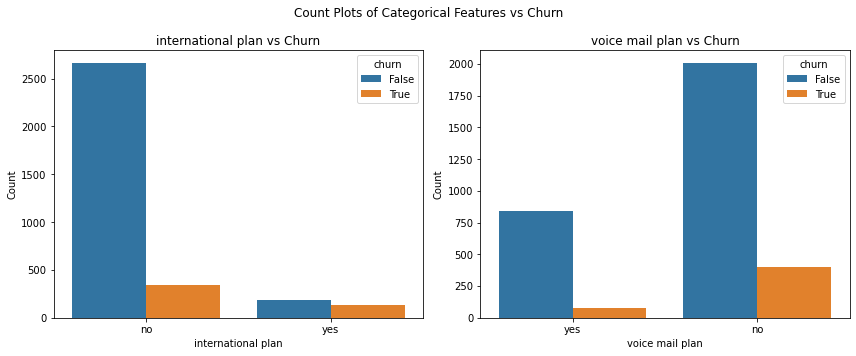

In [15]:
# Defining the categorical features
categorical_features2 = ['international plan', 'voice mail plan']

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Count Plots of Categorical Features vs Churn')

for i, feature in enumerate(categorical_features2):
    sns.countplot(x=feature, hue="churn", data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show();

* Customers with an 'international plan' have a much higher churn rate compared to those without. This could be a significant predictor.
* Voice mail plan' doesn't show as stark a contrast, but there's still some difference in churn rates between the two categories.

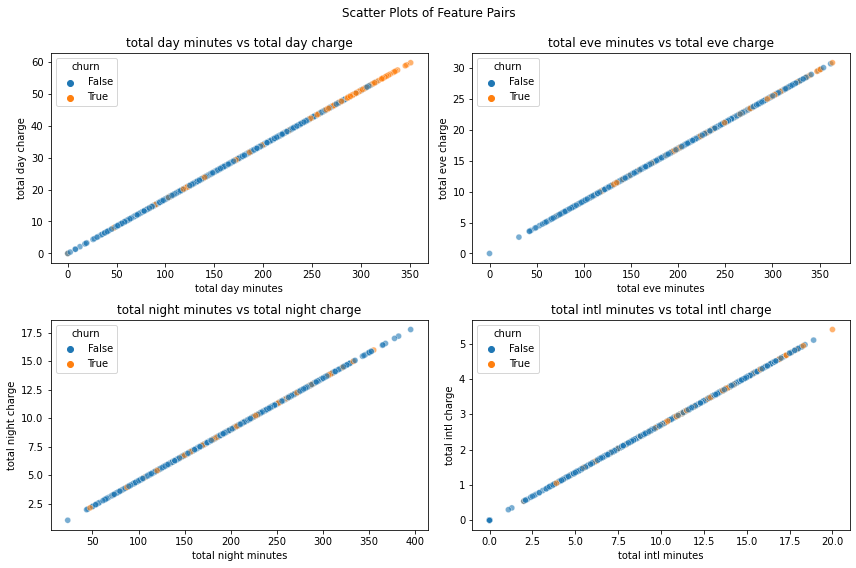

In [16]:
# Defining the feature pairs
feature_pairs = [
    ('total day minutes', 'total day charge'),
    ('total eve minutes', 'total eve charge'),
    ('total night minutes', 'total night charge'),
    ('total intl minutes', 'total intl charge')
]

# Setting up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Scatter Plots of Feature Pairs')

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    row, col = i // 2, i % 2
    sns.scatterplot(x=x_feature, hue='churn', y=y_feature,data=df, alpha=0.6, ax=axes[row, col])
    axes[row, col].set_title(f'{x_feature} vs {y_feature}')
    axes[row, col].set_xlabel(x_feature)
    axes[row, col].set_ylabel(y_feature)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

* The scatter plots confirm a direct linear relationship between the call minutes and their respective charges for day, evening, night, and international times. This is expected since charges are typically proportional to the minutes used.

* There's a dense overlap of points, especially at specific minute-charge combinations. This overlap suggests that there are standard rates being applied to call durations, leading to many customers incurring similar charges for similar call durations.

* Given the strong correlation between minutes and charges, we should consider removing either the minutes or the charges features to reduce multicollinearity. This step is crucial if we decide to employ linear models.

# 4. Data Preprocessing

In this section, we'll preprocess the data to make it suitable for machine learning. This will include encoding categorical features, scaling numerical features, and splitting the dataset.

### a). Encoding Categorical Features
We'll convert categorical features into a format that's suitable for machine learning algorithms. Specifically, we'll:
* Convert binary features like 'international plan', 'voice mail plan', and 'churn' to 0s and 1s.

In [17]:
# Encoding binary features
binary_features = ['international plan', 'voice mail plan', 'churn']
encoder = LabelEncoder()
for feature in binary_features:
    df[feature] = encoder.fit_transform(df[feature])

In [18]:
# Confirming that it worked
for feature in binary_features:
    unique_values = df[feature].unique()
    print(f'Unique values in {feature} after encoding: {unique_values}')

Unique values in international plan after encoding: [0 1]
Unique values in voice mail plan after encoding: [1 0]
Unique values in churn after encoding: [0 1]


### b).  Handling Outliers

In [19]:
# Defining numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 
                      'total eve minutes', 'total night minutes', 'total intl minutes', 'customer service calls']

# Handling outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for feature in numerical_features:
    df[feature] = np.where(df[feature] < lower_bound[feature], lower_bound[feature], df[feature])
    df[feature] = np.where(df[feature] > upper_bound[feature], upper_bound[feature], df[feature])

### c). Dropping Correlated Features
Based on our observations, we'll drop the charge-related columns to reduce multicollinearity, keeping the minute-related columns.

In [20]:
# Dropping the Correlated Features and unneccesary columns 
columns_to_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'area code', 'state']
df.drop(columns=columns_to_drop, inplace=True)

In [21]:
# Confirming it worked
print(f'shape is now{df.shape}')
print(df.columns)

shape is now(3333, 14)
Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn'],
      dtype='object')


### d). Scaling Numerical Features

In [22]:
# Scaling Numerical Features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [23]:
# Confirming it worked
df[numerical_features].describe()

,account length,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.001965e-16,-3.837315e-17,2.078545e-16,1.982612e-16,1.343060e-16,-1.790747e-16,-1.343060e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.522904e+00,-5.917781e-01,-2.681109e+00,-2.727707e+00,-2.719520e+00,-2.629780e+00,-1.333569e+00
25%,-6.812450e-01,-5.917781e-01,-6.670381e-01,-6.828129e-01,-6.750628e-01,-6.449226e-01,-4.302490e-01
50%,-8.326143e-05,-5.917781e-01,-7.686098e-03,7.748156e-03,7.420655e-03,1.669652e-02,-4.302490e-01
75%,6.558502e-01,8.696352e-01,6.756760e-01,6.804499e-01,6.879086e-01,6.783156e-01,4.730706e-01
max,2.661493e+00,3.061755e+00,2.689747e+00,2.725344e+00,2.732366e+00,2.663173e+00,1.828050e+00


### e). Splitting the Data

In [24]:
# Defining features and target variables
X = df.drop(columns=['churn'])
y = df['churn']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Checking for class imbalance
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

### f). Dealing with class imbalance
There's a class imbalance in our target variable. Given that the 'churn' class (True) is the minority, We will use SMOTE. This technique doesn't result in the loss of data (like undersampling) and doesn't merely replicate existing data (like simple oversampling). Instead, SMOTE creates synthetic, yet realistic, samples of the minority class.

In [27]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [28]:
# Dealing with the class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
# Confirming it Worked
y_train_resampled.value_counts()

1    2284
0    2284
Name: churn, dtype: int64

Now **"X_train_resampled"** and **"y_train_resampled"** have balanced classes, which we can then use to training our models. We only apply SMOTE to the training data to ensure our test data remains a realistic representation of the original data distribution.

# 5. Modeling

Having balanced our classes, we can proceed to the modeling phase. 
Given our binary classification problem and the data at hand, we can consider several algorithms:

* **Baseline Model:** Logistic Regression.
* **Non-parametric Models:** Decision Trees.
* **Ensemble Methods:** Random Forest

Starting with a simple model (like Logistic Regression) provides a baseline performance. From there, we can explore more complex models to see if they offer significant improvements. Iteratively building and evaluating models will allow us to understand the strengths and weaknesses of each approach.

## a). Baseline Model - Logistic Regression
First, we'll train a Logistic Regression model using the training data.

In [30]:
# Initializing the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Training the model using the SMOTE-augmented training data
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

After training, we'll predict and evaluate the model's performance on the test set using various metrics.

In [31]:
# Predictions on the test set
y_pred = logreg.predict(X_test)

#### Baseline model ROC-AUC Score

In [32]:
# Evaluation
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.7165


* **ROC-AUC:** The ROC-AUC score of **0.7165** is decent but there's still room for improvement. This score provides an aggregate measure of the model's ability to distinguish between the two classes, with values closer to 1 indicating better performance. 

#### Baseline Model Confusion Matrix Visualization

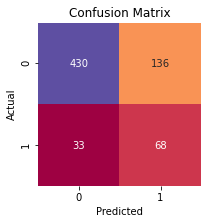

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Spectral', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Classification Report

In [34]:
# Converting the report dictionary to a DataFrame
report = classification_report(y_test, y_pred, output_dict=True)  # Use output_dict=True
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
report_df

Classification Report:


,precision,recall,f1-score,support
0,0.928726,0.759717,0.835763,566.000000
1,0.333333,0.673267,0.445902,101.000000
accuracy,0.746627,0.746627,0.746627,0.746627
macro avg,0.631030,0.716492,0.640832,667.000000
weighted avg,0.838569,0.746627,0.776728,667.000000


* **Overall Accuracy:** The model achieved an accuracy of **74.66%**. This means that the model correctly predicted whether a customer would churn or not for approximately **74.66%** of the test samples.
* **For class 0 (no churn):** **Precision:** **92.87%** of the predictions are correct. **Recall:** The model identified **75.97%** of all actual non-churn cases.
* **For class 1 (churn):** **Precision:** Only **33.33%** of the churn predictions are correct. **Recall:** The model identified **67.33%** of all actual churn cases.

### Improving Model Performance using and cross-validation

Using k-fold cross-validation provides a more robust estimate of the model's performance. Instead of relying on a single train-test split, we utilize multiple splits, ensuring that our model's performance isn't due to the randomness of a particular split. It helps in reducing variance and gives a better idea of how the model might perform on unseen data.

In [35]:
# Using 5-fold cross-validation to get a better estimate of the model's performance on the resampled training data
train_accuracy = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
print(f"Training Data Average ROC-AUC Score: {train_accuracy.mean():.4f}")
print(f"Training Data Standard Deviation: {train_accuracy.std():.4f}")

Training Data Average ROC-AUC Score: 0.8353
Training Data Standard Deviation: 0.0384


In [36]:
# Training the model on the entire resampled training set
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
# Predicting on the test set
y_pred = logreg.predict(X_test)

#### ROC-AUC Score

In [38]:
# Evaluating using ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Test Data ROC-AUC Score: {roc_auc:.4f}")

Test Data ROC-AUC Score: 0.7165


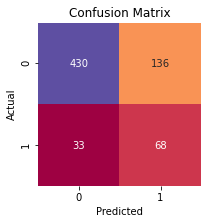

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Spectral', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Converting the report dictionary to a DataFrame
report = classification_report(y_test, y_pred, output_dict=True)  # Use output_dict=True
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
report_df

Classification Report:


,precision,recall,f1-score,support
0,0.928726,0.759717,0.835763,566.000000
1,0.333333,0.673267,0.445902,101.000000
accuracy,0.746627,0.746627,0.746627,0.746627
macro avg,0.631030,0.716492,0.640832,667.000000
weighted avg,0.838569,0.746627,0.776728,667.000000


### Observations:
* The model's performance on the test set remains consistent with the baseline model. This means that while the resampling helped the model achieve better performance on the training data (as seen by the cross-validation results), it did not translate to a significant improvement in the test set.
* The average ROC-AUC score from cross-validation on the resampled training data is **0.8353**, with a standard deviation of **0.0384**. This indicates a reasonably strong and consistent performance on the training data, suggesting that our model is effectively utilizing the information provided by SMOTE to classify both churned and retained customers.
* The Logistic Regression model's linear nature might be a limiting factor. While it performs reasonably well, it might not be capturing some of the more complex, non-linear relationships in the dataset.

## b). Model 2 - Decision Tree Model
We now build a second model using Decision Tree which are used for both regression and classification. They work by recursively splitting the dataset into two or more homogeneous sets based on the most significant attribute(s) at each level, making the decision at every node.

In [41]:
# Initializing the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Training the model on the resampled data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

In [42]:
# ROC-AUC Score
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print(f"Decision Tree ROC-AUC Score: {roc_auc_dt:.4f}")

Decision Tree ROC-AUC Score: 0.8199


The Decision Tree has an ROC-AUC score of **0.8199**. This score is a balance between the true positive rate and the false positive rate. A value close to 1 is considered good, and the current score suggests a reasonably strong model performance.

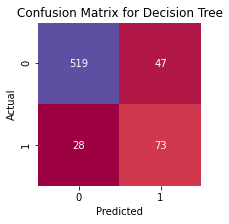

In [43]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Spectral', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

* **True Positives (TP):** 73 customers were correctly predicted to churn.
* **True Negatives (TN):** 519 customers were correctly predicted not to churn.
* **False Positives (FP):** 47 customers were incorrectly predicted to churn.
* **False Negatives (FN):** 28 customers were incorrectly predicted not to churn.

The model seems to be making more mistakes in predicting non-churn customers as churn (FP) compared to failing to identify actual churn customers (FN).

In [44]:
# Classification Report
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_df_dt = pd.DataFrame(report_dt).transpose()
print("Classification Report for Decision Tree:")
report_df_dt

Classification Report for Decision Tree:


,precision,recall,f1-score,support
0,0.948812,0.916961,0.932615,566.000000
1,0.608333,0.722772,0.660633,101.000000
accuracy,0.887556,0.887556,0.887556,0.887556
macro avg,0.778573,0.819867,0.796624,667.000000
weighted avg,0.897255,0.887556,0.891430,667.000000


* **Precision (Class 0):** Of all the predictions the model made for non-churning customers, **94.5%** were correct.
* **Precision (Class 1):** Of all the predictions the model made for churning customers, **60.8%** were correct.
* **Recall (Class 0):** The model correctly identified **91.7%** of the actual non-churning customers.
* **Recall (Class 1):** The model correctly identified **72.3%** of the actual churning customers.
* **F1-score:** The harmonic mean of precision and recall. For non-churning customers, it's **93.3%**, and for churning customers, it's **66.1%**.
* **Accuracy: Overall**, the model made correct predictions **88.8%** of the time.

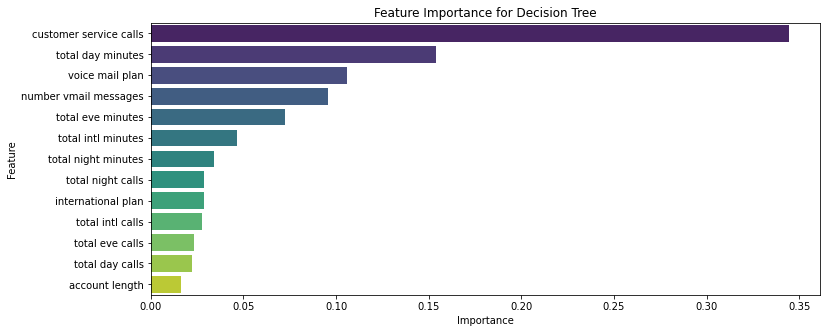

In [45]:
# Extracting feature importances
feature_importances_dt = dt_clf.feature_importances_

# Creating a DataFrame for visualization
features_df_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_dt
})

# Sorting the features based on importance
features_df_dt = features_df_dt.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=features_df_dt, palette='viridis')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Observations
* The features related to the daily usage, such as **customer service calls** appear to be the most influential in predicting customer churn followed by and **total day minutes**.
* The **account length** is the least influencial feature. This suggests that according to our model, the duration of time a customer has been using the service has no major significant impact on whether they'll churn or not.

## c). Model 3 -  Ensemble Method: Random Forest Model
Random Forest is an ensemble learning method that can handle binary, categorical, and regression tasks. It can capture non-linear relationships, handle interactions between features well, and generally provide higher accuracy than simpler models. It also has built-in feature importance, which can offer insights into which features are most influential in predicting churn.

In [46]:
# Initializing the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Trainning the model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [47]:
# Predicting on the test set
y_pred_rf = rf.predict(X_test)

#### Model 3  ROC-AUC

In [48]:
# Evaluating using ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest Test Data ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Test Data ROC-AUC Score: 0.8370


#### Model 3  Confusion Matrix

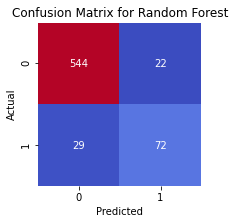

In [49]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [50]:
# Classification Report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report_rf).transpose()
print("\nRandom Forest Classification Report:")
report_df


Random Forest Classification Report:


,precision,recall,f1-score,support
0,0.949389,0.961131,0.955224,566.000000
1,0.765957,0.712871,0.738462,101.000000
accuracy,0.923538,0.923538,0.923538,0.923538
macro avg,0.857673,0.837001,0.846843,667.000000
weighted avg,0.921613,0.923538,0.922401,667.000000


### Observations:
* The model achieved an **accuracy** of approximately **92.35%** on the test data. This is a significant improvement over the logistic regression model.
* The **ROC-AUC** score of **0.8370** is higher than the logistic regression model's score.
* The model has **reduced** the number of **false positives** compared to the logistic regression model. This is crucial because falsely predicting a loyal customer as a churn might lead to unnecessary retention offers, costing the company.
* **Precision for Churn (1):** **76.60%** of the predicted churn cases were actual churn cases. This indicates a reduced likelihood of false alarms.
* **Recall for Churn (1):** The model identified approximately **71.29%** of all actual churn cases, which is a good detection rate but suggests there's room for improvement.
* **F1-Score:** The F1-score for churn cases is **73.85%**, indicating a good balance between precision and recall.

While the results are promising, We should consider tuning the hyperparameters of the Random Forest for further optimization.

### Model 3 Hyperparameter Tuning

In [51]:
# Defining the parameter grid for grid search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Creating an instance of the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=20, scoring='roc_auc', 
                                   cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Extract the best hyperparameters
best_params = random_search.best_params_

# Train the model using the best hyperparameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_resampled, y_train_resampled)

# Predict & evaluate
y_pred_best_rf = best_rf.predict(X_test)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest ROC-AUC Score: {roc_auc_best_rf:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimized Random Forest ROC-AUC Score: 0.8370


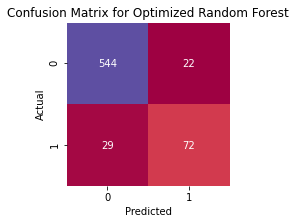

In [52]:
# Computing the confusion matrix
conf_matrix_rf_optimized = confusion_matrix(y_test, y_pred_best_rf)

# Visualizing the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_rf_optimized, annot=True, fmt='d', cmap='Spectral', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized Random Forest')
plt.show()

In [53]:
# Generating and printing the classification report
report_rf_optimized = classification_report(y_test, y_pred_best_rf, output_dict=True)
report_rf_optimized_df =  pd.DataFrame(report_rf_optimized).transpose()
print("Classification Report for Optimized Random Forest:")
report_rf_optimized_df

Classification Report for Optimized Random Forest:


,precision,recall,f1-score,support
0,0.949389,0.961131,0.955224,566.000000
1,0.765957,0.712871,0.738462,101.000000
accuracy,0.923538,0.923538,0.923538,0.923538
macro avg,0.857673,0.837001,0.846843,667.000000
weighted avg,0.921613,0.923538,0.922401,667.000000


### Feature Importance
Let's check the importance of each feature. Features with higher importance are those that, on average, led to a more significant decrease in impurity when used in the trees within the Random Forest.

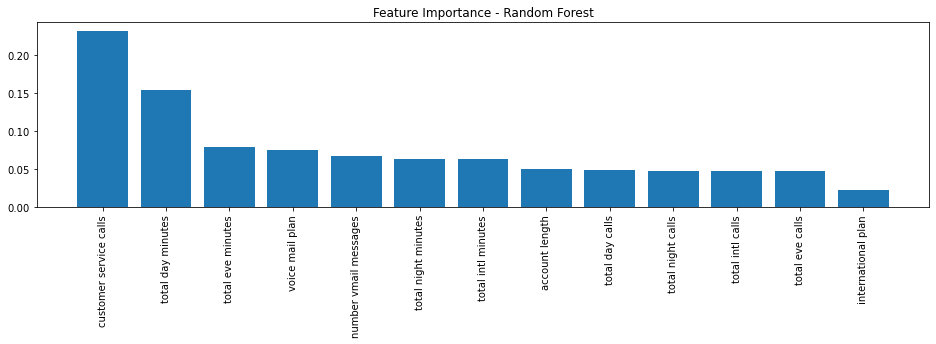

In [54]:
# Extracting feature importances from the trained Random Forest model
importances = best_rf.feature_importances_

# Sorting feature importances in descending order and getting the feature indices
indices = np.argsort(importances)[::-1]

# Rearranging feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Visualizing feature importance
plt.figure(figsize=(16, 3.4))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices],)
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

### Random Forest accuracy on entire dataset.
Using the Random Forest model to make predictions on our original dataframe and checking its accuracy to justify it's efficiency.

In [55]:
# Using the model to predict churn probabilities for the entire dataset
predicted_probabilities = best_rf.predict_proba(df.drop('churn', axis=1))[:, 1]

# Converting probabilities to class labels based on a 0.5 threshold
predicted_labels = [1 if prob > 0.5 else 0 for prob in predicted_probabilities]

# Comparing predicted labels with actual labels to calculate accuracy
accuracy = sum(predicted_labels == df['churn']) / len(df)
print(f"Accuracy on the entire dataset: {accuracy:.4f}")

# Adding predictions to the dataframe
df['predicted_churn'] = predicted_labels

Accuracy on the entire dataset: 0.9847


In [58]:
# Visualizing the actual vs predicted.
df.sample(15)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,predicted_churn
2408,-0.832614,0,0,-0.591778,0.971184,76,-0.946734,103,0.274826,107,0.090210,2,-0.430249,0,0
1675,-0.201909,0,0,-0.591778,-0.703977,95,0.396685,100,0.524272,71,-0.020060,3,-1.333569,0,0
498,-0.656017,1,0,-0.591778,0.581483,61,-1.893279,119,-0.497457,63,-0.203843,4,1.828050,1,1
1919,-0.025311,0,0,-0.591778,-2.013446,94,0.289529,102,0.598108,125,-0.277356,1,1.828050,1,1
1505,1.564066,0,0,-0.591778,0.797573,120,0.515747,98,-0.250007,125,-0.534653,5,-0.430249,0,0
1921,0.882904,0,0,-0.591778,-1.442746,105,0.035529,99,-1.289697,119,-0.314113,6,1.376390,0,0
3312,2.018174,0,0,-0.591778,0.925011,130,-1.123343,93,1.228707,110,1.450205,4,0.473071,0,0
727,-0.933527,0,0,-0.591778,0.830818,111,-0.218470,101,0.410525,110,-0.387626,2,-0.430249,0,0
1125,0.252199,0,0,-0.591778,-0.692895,75,-1.551967,106,0.572166,94,0.935612,9,0.473071,0,0
3179,0.226971,0,0,-0.591778,0.236108,102,-0.438735,118,0.274826,74,-0.314113,4,-0.430249,0,0


### Observations
* The Random Forest Model achieved an Accuracy of **98.5%** on the entire dataset.
* The features related to the daily usage, such as **customer service calls** and **total day minutes**, appear to be the most influential in predicting customer churn. This suggests that the daily experience and interactions with customer service play a significant role in a customer's decision to stay with or leave the company.
* The importance of **customer service calls** underscores the significance of customer interactions with the service department. A possible hypothesis could be that frequent calls to customer service might be indicative of issues or dissatisfaction, leading to churn.

# 6. Evaluation
After implementing and analyzing three different models - Logistic Regression, Random Forest, and XGBoost, we can summarize our findings. In this section, we will evaluate and compare the performance of our three models

### a). ROC-AUC Score:
* **Baseline Model (Logistic Regression):** Achieved an ROC-AUC score of **0.7165**.
* **Decision Tree:** Achieved an ROC-AUC score of **0.8199**.
* **Random Forest:** Achieved an ROC-AUC score of **0.8370**.

The Random Forest model outperformed both the baseline model and the Decision Tree, indicating its superior ability to differentiate between churn and non-churn customers.

### b). Precision, Recall, and F1-Score:
For the Churn class (which is of primary interest to us):
* **Baseline Model** had a **precision** of **33.33%**, **recall** of **67.32%**, and an **F1-score** of **44.59%**.
* **Decision Tree** had a **precision** of **60.83%**, **recall** of **72.28%**, and an **F1-score** of **66.06%**.
* **Random Forest** had a **precision** of **76.5%**, a **recall** of **71.3%**, and an **F1-score** of **73.8%**.

The Random Forest model and Decision Tree model showed a significant improvement over the Baseline Model in terms of precision, recall, and F1-score.

### c). Confusion Matrix:
**The Baseline Model** had a tendency to misclassify non-churn customers as churn, leading to more false positives.

The **Decision Tree** and **Random Forest** models had fewer false positives and false negatives, demonstrating their superior classification capabilities.

### d). Feature Importance:
The **Random Forest** and **Decision Tree** models highlighted the most significant features were **'customer service calls'** and **'total day minutes'**.

### e). Interpretability:
While the **Baseline Model** provides coefficients for each feature, indicating their importance, it may not capture non-linear relationships between features and the target variable.

**The Decision Tree** stands out in terms of interpretability. We can visualize the entire decision-making process, understanding which features play a role at each decision node.

**Random Forest** being an ensemble model, loses some interpretability but gains in predictive performance. It demonstrated the best performance among the three models in terms of ROC-AUC, precision, recall, and F1-score.

# 7. Conclusions:
Among the models we tested in predicting customer churn rates at SyriaTel Communications, the **Random Forest** emerged as the most effective in predicting customer churn, followed closely by the Decision Tree. Our baseline model, Logistic Regression, set a performance benchmark that the other two models surpassed.

Features like **'customer service calls'**, and the **'total day minutes'**. were consistently highlighted as significant predictors of churn. This suggests that daily charges which had direct linear relationship with **daily minutes**, and the quality of customer service, are areas where customer dissatisfaction may arise, leading to churn.

# 8. Recommendations

Focus on **Customer Service:** A significant number of customer service calls is a strong predictor of churn. This suggests that customers who experience issues or dissatisfaction often turn to customer service. Improving the quality and efficiency of customer service can lead to higher customer retention. This could vary from quick resolution time of issues to having personalised experiences through technologies such as Customer Relationship Management System (CRM)

**Review Pricing Structure:** The **'Total day minutes'** feature emerged as a significant predictor. With the direct linear relationship it has with **'Total day charge'**, It would be worthwhile to analyze the pricing structure, especially for day-time charges, and see if it aligns with competitors and the perceived value by the customers.

**Continuous Monitoring:** While we've identified key predictors of churn now, customer behaviors and preferences evolve. It's crucial to **continuously monitor** and update the model to reflect new data and insights. Implementing a real-time feedback loop will allow for timely interventions.

**Expand Model Exploration:**
While the Random Forest model performed well, there's always **room for improvement**. Advanced models, further hyperparameter tuning, and additional feature engineering could enhance predictive performance.

**Engage with Customers:** SyriaTel should consider running targeted surveys or focus groups with customers, especially those identified as 'at-risk' by the model. Direct feedback can provide more context and depth to the insights gathered from the data.

**Implement Retention Strategies:** For customers predicted to churn, consider implementing retention strategies such as loyalty programs, special offers, or personalized communications to improve their satisfaction and likelihood to stay.

By proactively addressing the areas of concern highlighted by our models and implementing the above recommendations, SyriaTel can significantly mitigate customer churn and enhance customer loyalty and satisfaction.